# DWDM-Lab-CSE-5021_Lab-Assignment-4:- Implementation and analysis of the efficiency of Clasification of two Classification Algorithms :- (Support Vector Machine Classification and K-Nearest Neighbours Classification) on Social_Network_Ads dataset

Submitted By: 20MAI0001 - NIHARIKA MAITRA

To find the Input dataset and the .ipynb file used for this Assignment please visit :

Kaggle link for dataset : https://www.kaggle.com/akram24/social-network-ads

Git Repo link: 


    
    
https://github.com/Niharika-20-MAI-01/Winter-2021-DWDM-LabCSE5021-Niharika-20MAI01/blob/main/20MAI0001_DWDM-Lab-CSE-5021_Lab-Assignment-4%20%20SVM%20Classification%20and%20KNN%20%20Classification.ipynb

https://github.com/Niharika-20-MAI-01/Winter-2021-DWDM-LabCSE5021-Niharika-20MAI01
    

# To perform Classification on the Social_Network_Ads dataset with Support Vector Machine Classifier and K-Nearest Neighbours Classifier :

In [246]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Dataset Description :

This Social_Network_Ads Dataset contains information about users on a Social Networking site. Using this information as Features for any ML Classifier model, it can be predicted that whether a particular user after clicking on a ad on the Social networking site goes on to buy a particular product or not.

Here, in this Social_Network_Ads dataset it is considered that this particular Social Network has a Business client which basically is a car company that advertises itself by putting adds on the social networking site. Now the work of the social network here is to gather information as to whether the user bought the product or not.

The dependent variable in this case is Purchased which is 1 if user purchases the car and 0 otherwise.

So the goal here is to train a classifier which would put each user into the correct category by predicting as to whether he’s buying the product or not.


In [247]:
# Importing the dataset
data1 = pd.read_csv('Social_Network_Ads.csv')
X = data1.iloc[:, [2, 3]].values
y = data1.iloc[:, 4].values

Information Related to the dataset:

In [248]:
data1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [249]:
data1.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [250]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [251]:
#Data types of the Features of the Input dataset are displayed
data1.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [252]:
#Information about number of rows and columns of the Input dataset
data1.shape

(400, 5)

In [253]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [254]:
print(f"Lenght of X_train: {len(X_train)}\nLenght of X_test: {len(X_test)}")
print(f"Lenght of y_train: {len(y_train)}\nLenght of y_test: {len(y_test)}")

Lenght of X_train: 300
Lenght of X_test: 100
Lenght of y_train: 300
Lenght of y_test: 100


In [255]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Support Vector Machine Classifier :

Support Vector Machine(SVM) is a supervised machine learning algorithm which is mostly used in classification problems. 

In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features present in the dataset) with the value of each feature being the value of a particular coordinate. 

Then, we perform classification by finding the hyper-plane that differentiates the two classes most accurately.

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. 

In other words, given labeled training data (supervised learning), the SVM algorithm outputs an optimal hyperplane which categorizes new datapoints.

In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

The goal of SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that it becomes easy to segregate the new data point in the correct category in future.

This best decision boundary is known as a hyperplane.
SVM chooses the extreme points/vectors that help in creating the hyperplane. 

These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

# Implementation of Support Vector Machine Classification :

In [256]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [257]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [258]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [259]:
# Accuracy on the Test set results                              
from sklearn.metrics import accuracy_score
print('Accuracy Score on the Test set for Support Vector Machine Classification  : ',accuracy_score(y_test,y_pred)) 

Accuracy Score on the Test set for Support Vector Machine Classification  :  0.9


In [260]:
print('Accuracy / Efficiency of the Support Vector Machine Classifier in Classifying the Social_Network_Ads Dataset correctly : ', accuracy_score(y_test,y_pred))

Accuracy / Efficiency of the Support Vector Machine Classifier in Classifying the Social_Network_Ads Dataset correctly :  0.9


In [261]:
# Classification Report for Support Vector Machine Classification :

from sklearn.metrics import classification_report

report1 = classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


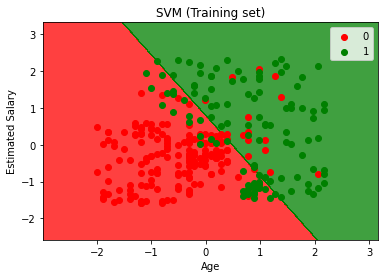

In [262]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


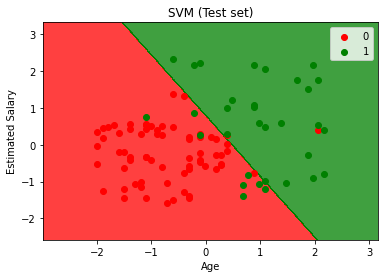

In [263]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# K-Nearest Neighbours Classifier :

K-Nearest Neighbours (KNN) is a Supervised machine learning algorithm which is mostly used in classification problems.

KNN algorithm assumes the similarity between the new case/Test data and the available cases/Training data and put the new case/Test data into the category that is most similar to the available categories.

KNN algorithm stores all the available/training data and classifies a new/test data point based on the similarity. 
Accordingly, when new data appears then it can be easily classified into a well suited category by using KNN algorithm.

KNN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
KNN makes predictions using the training dataset directly.

KNN is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset(Training data) and at the time of classification on the Test set, it refers the stored dataset(Training data)to perform Classification on the new data/ Test data.

Thus, KNN algorithm at the training phase just stores the dataset and when it gets new data/ Test data, then it classifies that new data into an appropriate category that is much similar to the new data, based on the reference from the stored dataset(Training data). 

In KNN algorithm predictions are made for a new instance (x) by searching through the entire training set for the K most similar instances (the neighbours) and summarizing the output variable for those K instances. 
In case of classification this might be the mode (or most common) class value.

To determine which of the K instances in the training dataset are most similar to a new input/Test data point, a distance measure is used, like the Euclidean distance measure (most popular) for real-valued input variables.

Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (xi) across all input attributes j.

Mathematically, EuclideanDistance(x, xi) = sqrt( sum( (xj – xij)^2 ) ), 


# Implementation of K-Nearest Neighbours Classification :

In [264]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [265]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [266]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [267]:
# Accuracy on the Test set results                              
from sklearn.metrics import accuracy_score
print('Accuracy Score on the Test set for K-Nearest Neighbours Classification  : ',accuracy_score(y_test,y_pred)) 

Accuracy Score on the Test set for K-Nearest Neighbours Classification  :  0.93


In [268]:
print('Accuracy / Efficiency of the K-Nearest Neighbours Classifier in Classifying the Social_Network_Ads Dataset correctly : ', accuracy_score(y_test,y_pred))

Accuracy / Efficiency of the K-Nearest Neighbours Classifier in Classifying the Social_Network_Ads Dataset correctly :  0.93


In [269]:
# Classification Report for K-Nearest Neighbours Classification :

from sklearn.metrics import classification_report

report1 = classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


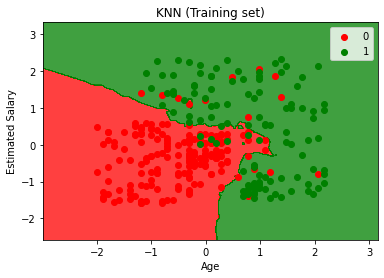

In [270]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


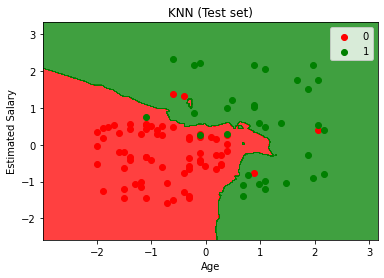

In [271]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()